## Capstone Project - The Battle of Neighborhoods

### Roberto Vertiz

Suitable New Store Locations in Paris for a Fashion Retailer

## Locations for New Fashion Stores in High Traffic Areas in Paris France

### The Task At Hand

A digitally native vertical fashion retailer, with a substantial e-commerce footprint, has begun the rollout of brick and mortar stores as part of their omnichannel retail strategy. After rolling out stores in a few select cities by guessing where the best locations were to open, as part of their store expansion for Paris they've decided to be more informed and selective, and take the time to do some research.

I've been given the exciting task of assisting them to make data-driven decisions on the new locations that are most suitable for their new stores in Paris. This will be a major part of their decision-making process, the other being on the ground qualitative analysis of districts once this data and report are reviewed and studied.

The fashion brand is not what is considered high-end, they are positioned in upper end of the fast fashion market. As such, they do not seek stores in the premium upmarket strips like Avenue Montaigne, but rather, in high traffic areas where consumers go for shopping, restaurants and entertainment. Foursquare data will be very helpful in making data-driven decisions about the best of those areas.

### Criteria

Qualitative data from another retailer that they know, suggests that the best locations to open new fashion retail stores may not only be where other clothing is located. This data strongly suggests that the best places are in fact areas that are near French Restaurants, Cafés and Wine Bars. Parisians are very social people that frequent these place often, so opening new stores in these locations is becoming popular.

The analysis and recommendations for new store locations will focus on general districts with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.

### Why Data?

Without leveraging data to make decisions about new store locations, the company could spend countless hours walking around districts, consulting many real estate agents with their own district biases, and end up opening in yet another location that is not ideal.

Data will provide better answers and better solutions to their task at hand.

### Outcomes

The goal is to identify the best districts - Arrondissements - to open new stores as part of the company's plan. The results will be translated to management in a simple form that will convey the data-driven analysis for the best locations to open stores.

## 2 The Data Science Workflow

### Requirements

The main districts in Paris are divided into 20 Arrondissements Municipaux (administrative districts), shortened to arrondissements.

The data regarding the districts in Paris needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores.

### The Data Science Workflow for Part 1 & 2 includes the following:

* Outline the initial data that is required:

+ District data for Paris including names, location data if available, and any other details required.

* Obtain the Data:

+    Research and find suitable sources for the district data for Paris.
+    Access and explore the data to determine if it can be manipulated for our purposes.

* Initial Data Wrangling and Cleaning:
+    Clean the data and convert to a useable form as a dataframe.

### The Data Science Workflow for parts 3 & 4 includes:

* Data Analysis and Location Data:

+    Foursquare location data will be leveraged to explore or compare districts around Paris.

+    Data manipulation and analysis to derive subsets of the initial data.

+    Identifying the high traffic areas using data visualisation and tatistical nalysis.

* Visualization:

+    Analysis and plotting visualizations.

+    Data visualization using various mapping libraries.

* Discussion and Conclusions:

+    Recomendations and results based on the data analysis.

+    Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

Import the Required Libraries

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

Data Research and Preparation
Import the Paris District Data
Arrondissements Municipaux for Paris CSV (administrative districts)
Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Data for the arrondissements is necessary to select the most suitable of these areas for new stores.

Initially looking to get this data by scraping the relevent Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

In [2]:
# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [3]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


Clean up the dataset to remove unnecessary columns

In [4]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


## Week 2 - Data Analysis

### 3 Methodology and Exploratory Data Analysis

#### The Data Science Workflow for parts 3 & 4 includes:

* Data Analysis and Location Data:

+ Foursquare location data will be leveraged to explore or compare districts around Paris.

+ Data manipulation and analysis to derive subsets of the initial data.

+ Identifying the high traffic areas using data visualisation and tatistical nalysis.

### Visualization:

* Analysis and plotting visualizations.

+ Data visualization using various mapping libraries.

#### Discussion and Conclusions:

* Recomendations and results based on the data analysis.

+ Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

In [5]:
# Check the shape of the dataframe
paris.shape

(20, 5)

In [6]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [7]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)

### Define Foursquare Credentials and Version

In [8]:
CLIENT_ID = 'RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R' # your Foursquare ID
CLIENT_SECRET = 'GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R
CLIENT_SECRET:GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL


## Exploratory data analysis

In [9]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

### The first arrondissement is identified as 3eme Ardt

In [10]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


Get the top 100 venues that are in the neighborhood 3eme Ardt within a radius of 500 meters

In [11]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R&client_secret=GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [12]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb1fe8f0be7b4001b0fcc17'},
 'response': {'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.86391016055883,
          'lng': 2.360590696334839}],
        'distance': 123,
        'postalCode': '75003',
        '

Define the function that extracts the category of the venue

In [13]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
2,Fromagerie Jouannault,Cheese Shop,48.862947,2.362530
3,Square du Temple,Park,48.864475,2.360816
4,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
5,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
6,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
7,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
8,Hôtel Jules & Jim,Hotel,48.863496,2.357395
9,SoMa,Japanese Restaurant,48.861511,2.362146


In [15]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

85 venues were returned by Foursquare.


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Create a new dataframe called for the venues of Paris called paris-venues

In [17]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [18]:
print(paris_venues.shape)
paris_venues.head(250)

(1240, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,3eme Ardt,48.862872,2.360001,Fromagerie Jouannault,48.862947,2.362530,Cheese Shop
3,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
4,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
5,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
6,3eme Ardt,48.862872,2.360001,Okomusu,48.861453,2.360879,Okonomiyaki Restaurant
7,3eme Ardt,48.862872,2.360001,Le Burger Fermier des Enfants Rouges,48.862831,2.362073,Burger Joint
8,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
9,3eme Ardt,48.862872,2.360001,SoMa,48.861511,2.362146,Japanese Restaurant


Check how many venues were returned for each neighborhood

Please be aware of the 100 venue limit imposed by the free Foursquare account.

In [19]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,67,67,67,67,67,67
12eme Ardt,5,5,5,5,5,5
13eme Ardt,58,58,58,58,58,58
14eme Ardt,24,24,24,24,24,24
15eme Ardt,63,63,63,63,63,63
16eme Ardt,11,11,11,11,11,11
17eme Ardt,57,57,57,57,57,57
18eme Ardt,41,41,41,41,41,41


Calculate how many unique venue categories there are

In [20]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 193 unique venue categories.


Analyze each of the Neighborhoods

In [21]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
paris_onehot.shape

(1240, 194)

Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [24]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.02,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.010000,0.00,0.000000,0.000000,0.00,0.020000,0.020000,0.000000,0.0,0.0
1,11eme Ardt,0.014925,0.00,0.000000,0.00,0.000000,0.000000,0.014925,0.000000,0.014925,...,0.014925,0.00,0.014925,0.014925,0.00,0.044776,0.000000,0.014925,0.0,0.0
2,12eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.2,0.2
3,13eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.189655,...,0.000000,0.00,0.000000,0.224138,0.00,0.000000,0.000000,0.000000,0.0,0.0
4,14eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0
5,15eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.015873,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.015873,0.015873,0.0,0.0
6,16eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0
7,17eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.017544,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0
8,18eme Ardt,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.024390,0.00,0.024390,0.000000,0.000000,0.0,0.0
9,19eme Ardt,0.000000,0.00,0.022727,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.022727,0.00,0.000000,0.022727,0.000000,0.0,0.0


In [25]:
# The shape of the grouped data is
paris_grouped.shape

(20, 194)

Print each neighborhood with it's top 10 most common venues

In [26]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.13
1          Coffee Shop  0.05
2               Bistro  0.05
3                Hotel  0.04
4                 Café  0.04
5    Indian Restaurant  0.04
6  Japanese Restaurant  0.03
7          Pizza Place  0.03
8    Korean Restaurant  0.02
9             Wine Bar  0.02


----11eme Ardt----
                venue  freq
0   French Restaurant  0.10
1         Supermarket  0.06
2          Restaurant  0.06
3         Pastry Shop  0.04
4            Wine Bar  0.04
5                 Bar  0.03
6        Cocktail Bar  0.03
7                Café  0.03
8             Theater  0.03
9  Italian Restaurant  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit   0.2
1      Monument / Landmark   0.2
2               Restaurant   0.2
3              Supermarket   0.2
4                      Zoo   0.2
5       Italian Restaurant   0.0
6                     Park   0.0
7                   Museum   0.0
8              

Put that data into a pandas dataframe and sort the venues in descending order

In [27]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## The top 10 venue categories for each neighborhood

This is a very useful results table that can provide at a glance information for all of the districts. Even once any conclusions are drawn further into the data workflow, we can refer back to this table for meaaningful insights about the top categories of businesses in all the neighbourhoods. Even without actual counts and numbers, it makes a great reference table for the client.

In [28]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Coffee Shop,Bistro,Indian Restaurant,Café,Hotel,Pizza Place,Japanese Restaurant,Bar,Cocktail Bar
1,11eme Ardt,French Restaurant,Supermarket,Restaurant,Wine Bar,Pastry Shop,Japanese Restaurant,Pizza Place,Bar,Bakery,Café
2,12eme Ardt,Zoo Exhibit,Zoo,Monument / Landmark,Supermarket,Restaurant,Deli / Bodega,Exhibit,Ethiopian Restaurant,Electronics Store,Donut Shop
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Chinese Restaurant,Thai Restaurant,Juice Bar,Japanese Restaurant,Sandwich Place,Butcher,Cambodian Restaurant
4,14eme Ardt,French Restaurant,Food & Drink Shop,Hotel,Bakery,Brasserie,Pizza Place,Bistro,Supermarket,Sushi Restaurant,Tea Room
5,15eme Ardt,Hotel,Italian Restaurant,French Restaurant,Coffee Shop,Bakery,Indian Restaurant,Supermarket,Brasserie,Lebanese Restaurant,Thai Restaurant
6,16eme Ardt,Plaza,Park,Lake,Pool,Boat or Ferry,Art Museum,Bus Station,French Restaurant,Department Store,Ethiopian Restaurant
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Bakery,Café,Bistro,Plaza,Diner,Restaurant
8,18eme Ardt,Bar,French Restaurant,Convenience Store,Hotel,Restaurant,Coffee Shop,Pizza Place,Seafood Restaurant,Sandwich Place,Café
9,19eme Ardt,Bar,French Restaurant,Supermarket,Bistro,Beer Bar,Seafood Restaurant,Hotel,Brewery,Plaza,Japanese Restaurant


In [29]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

## The business types criteria specified by the client! 'French Restaurants', 'Cafés' and 'Wine Bars'

### Let's look at their frequency of occurance for all the Paris neighborhoods, isolating the categorical venues

These are the venue types that the client wants to have an abundant density of in the ideal store locations. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

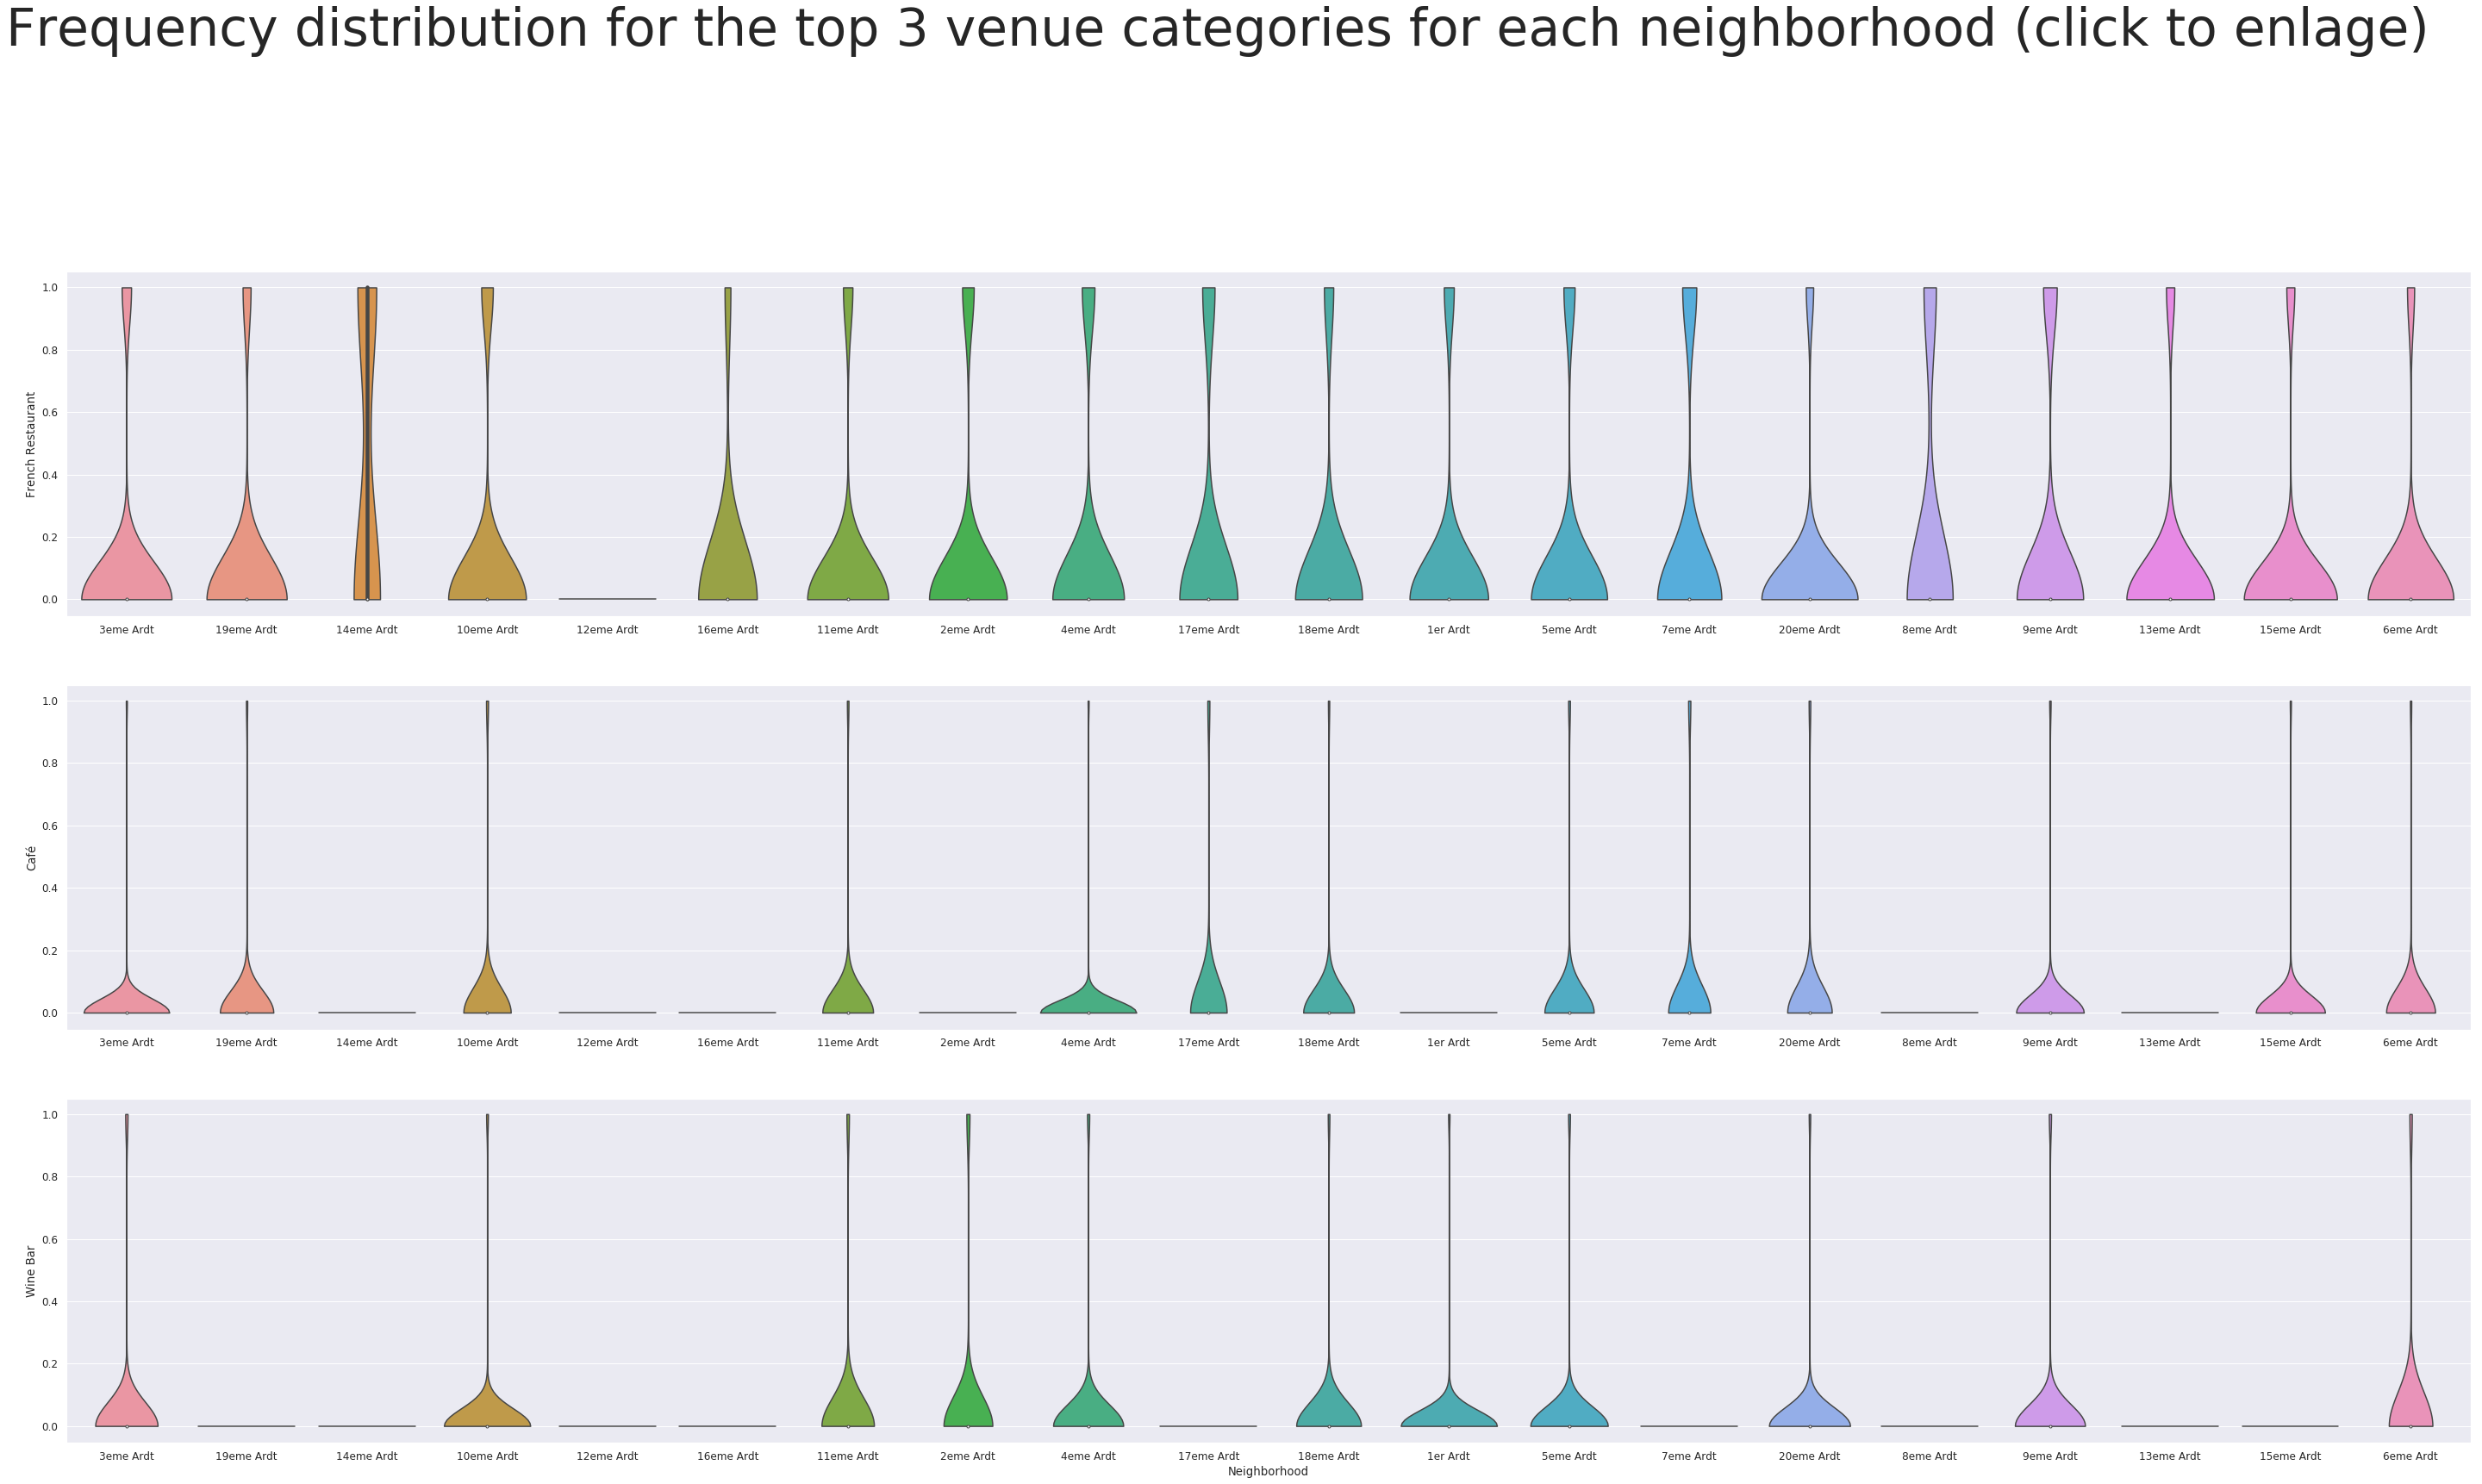

In [30]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()


## The Neighborhoods

So as we can see from the analysis there are 8 neighborhoods to open new stores - according to the criteria that they have the 3 specified venues in a great frequency (French Restaurants, Cafés and Wine Bars). They are as follows:

## Neighborhoods

3eme Ardt
10eme Ardt
11eme Ardt
4eme Ardt
18eme Ardt
18eme Ardt
5eme Ardt
9eme Ardt
6eme Ardt

### Let's take this further with some exploration and Inferential Analysis

We have the 8 neighborhoods that all include the venue category criteria.
But if we included the 'Clothing_Store" venue category into the analysis, then we might be able to make some inferences based on the data, and domain knowledge of marketing and the industry, to focus the list.

#### Let's look at the venue category - ''Clothing Store'

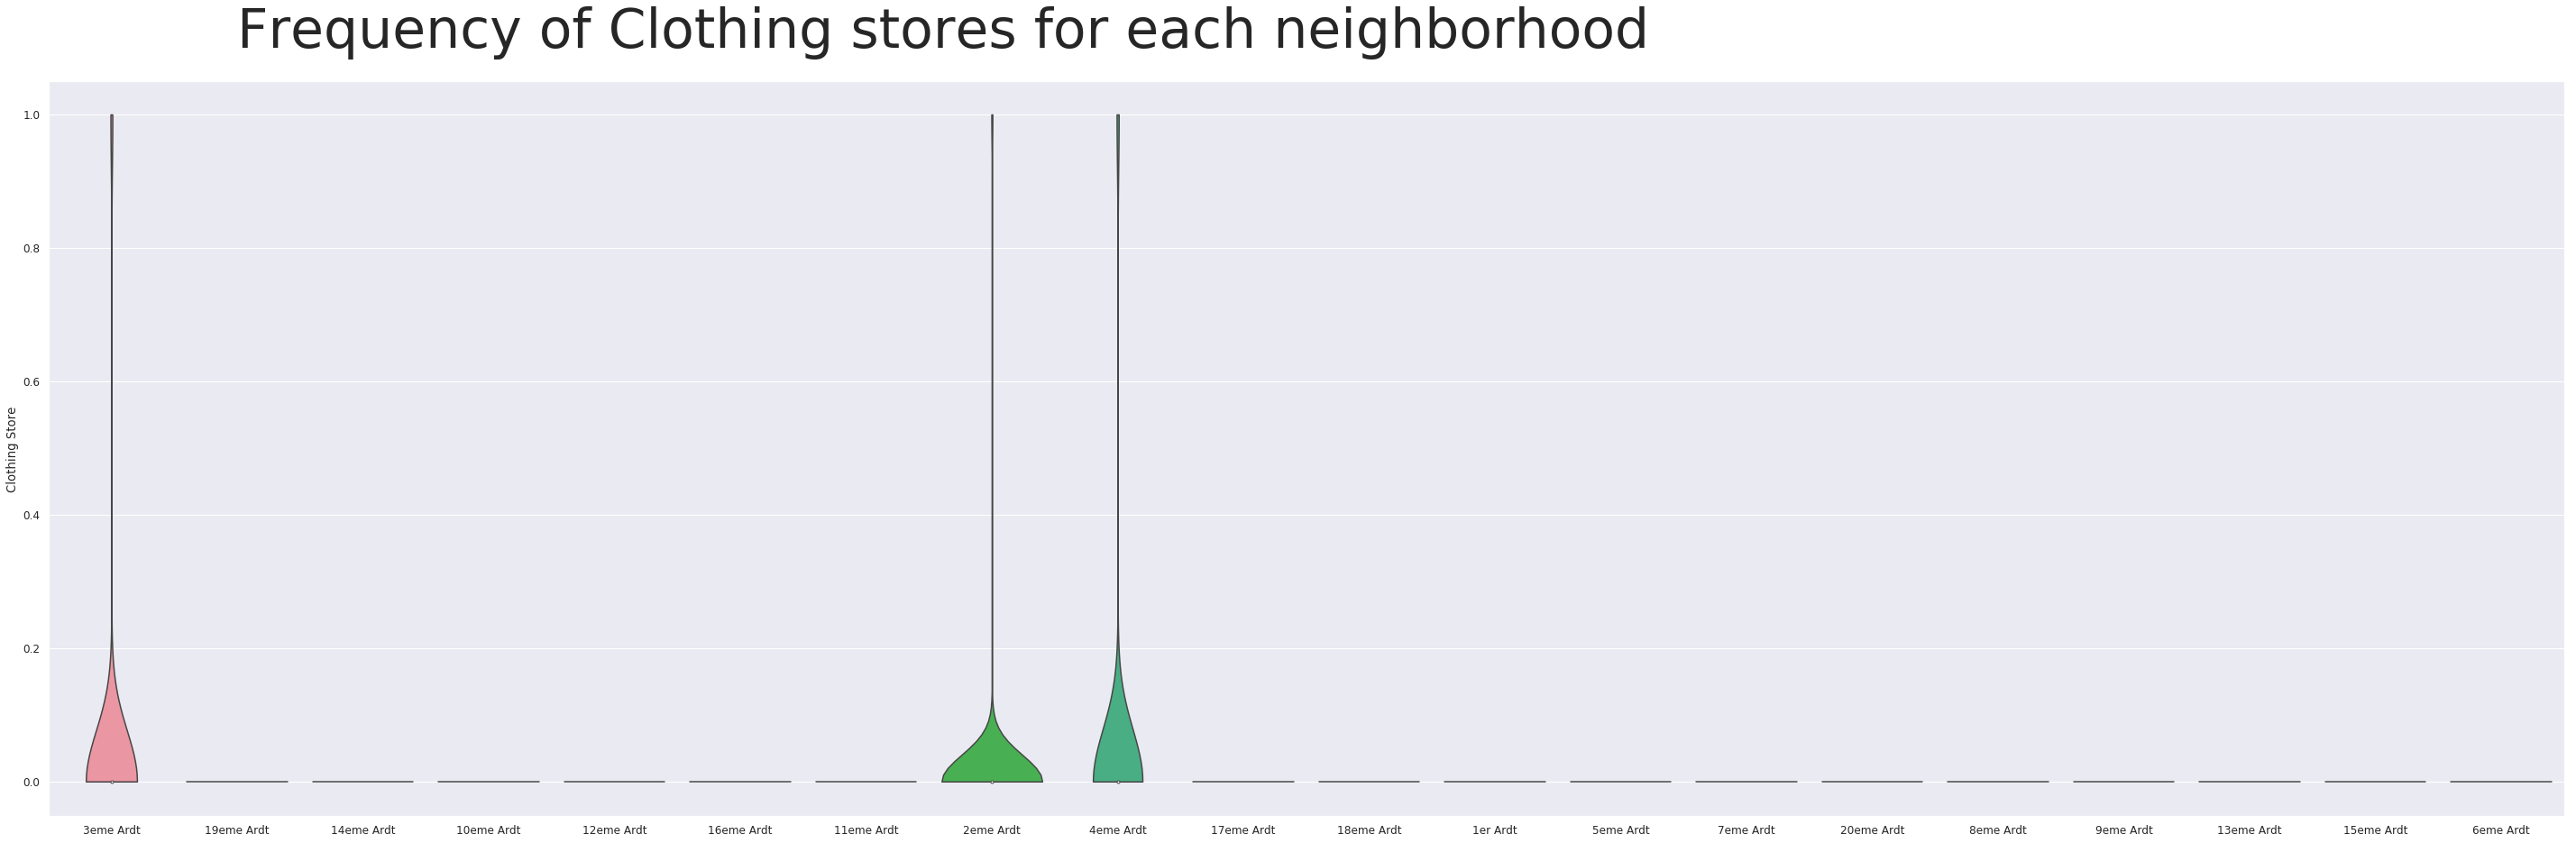

In [31]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()


So there are 5 neighborhoods that have a significant frequency density of clothing stores.

### Let's add this to the analysis with the other 3 specified categories as below

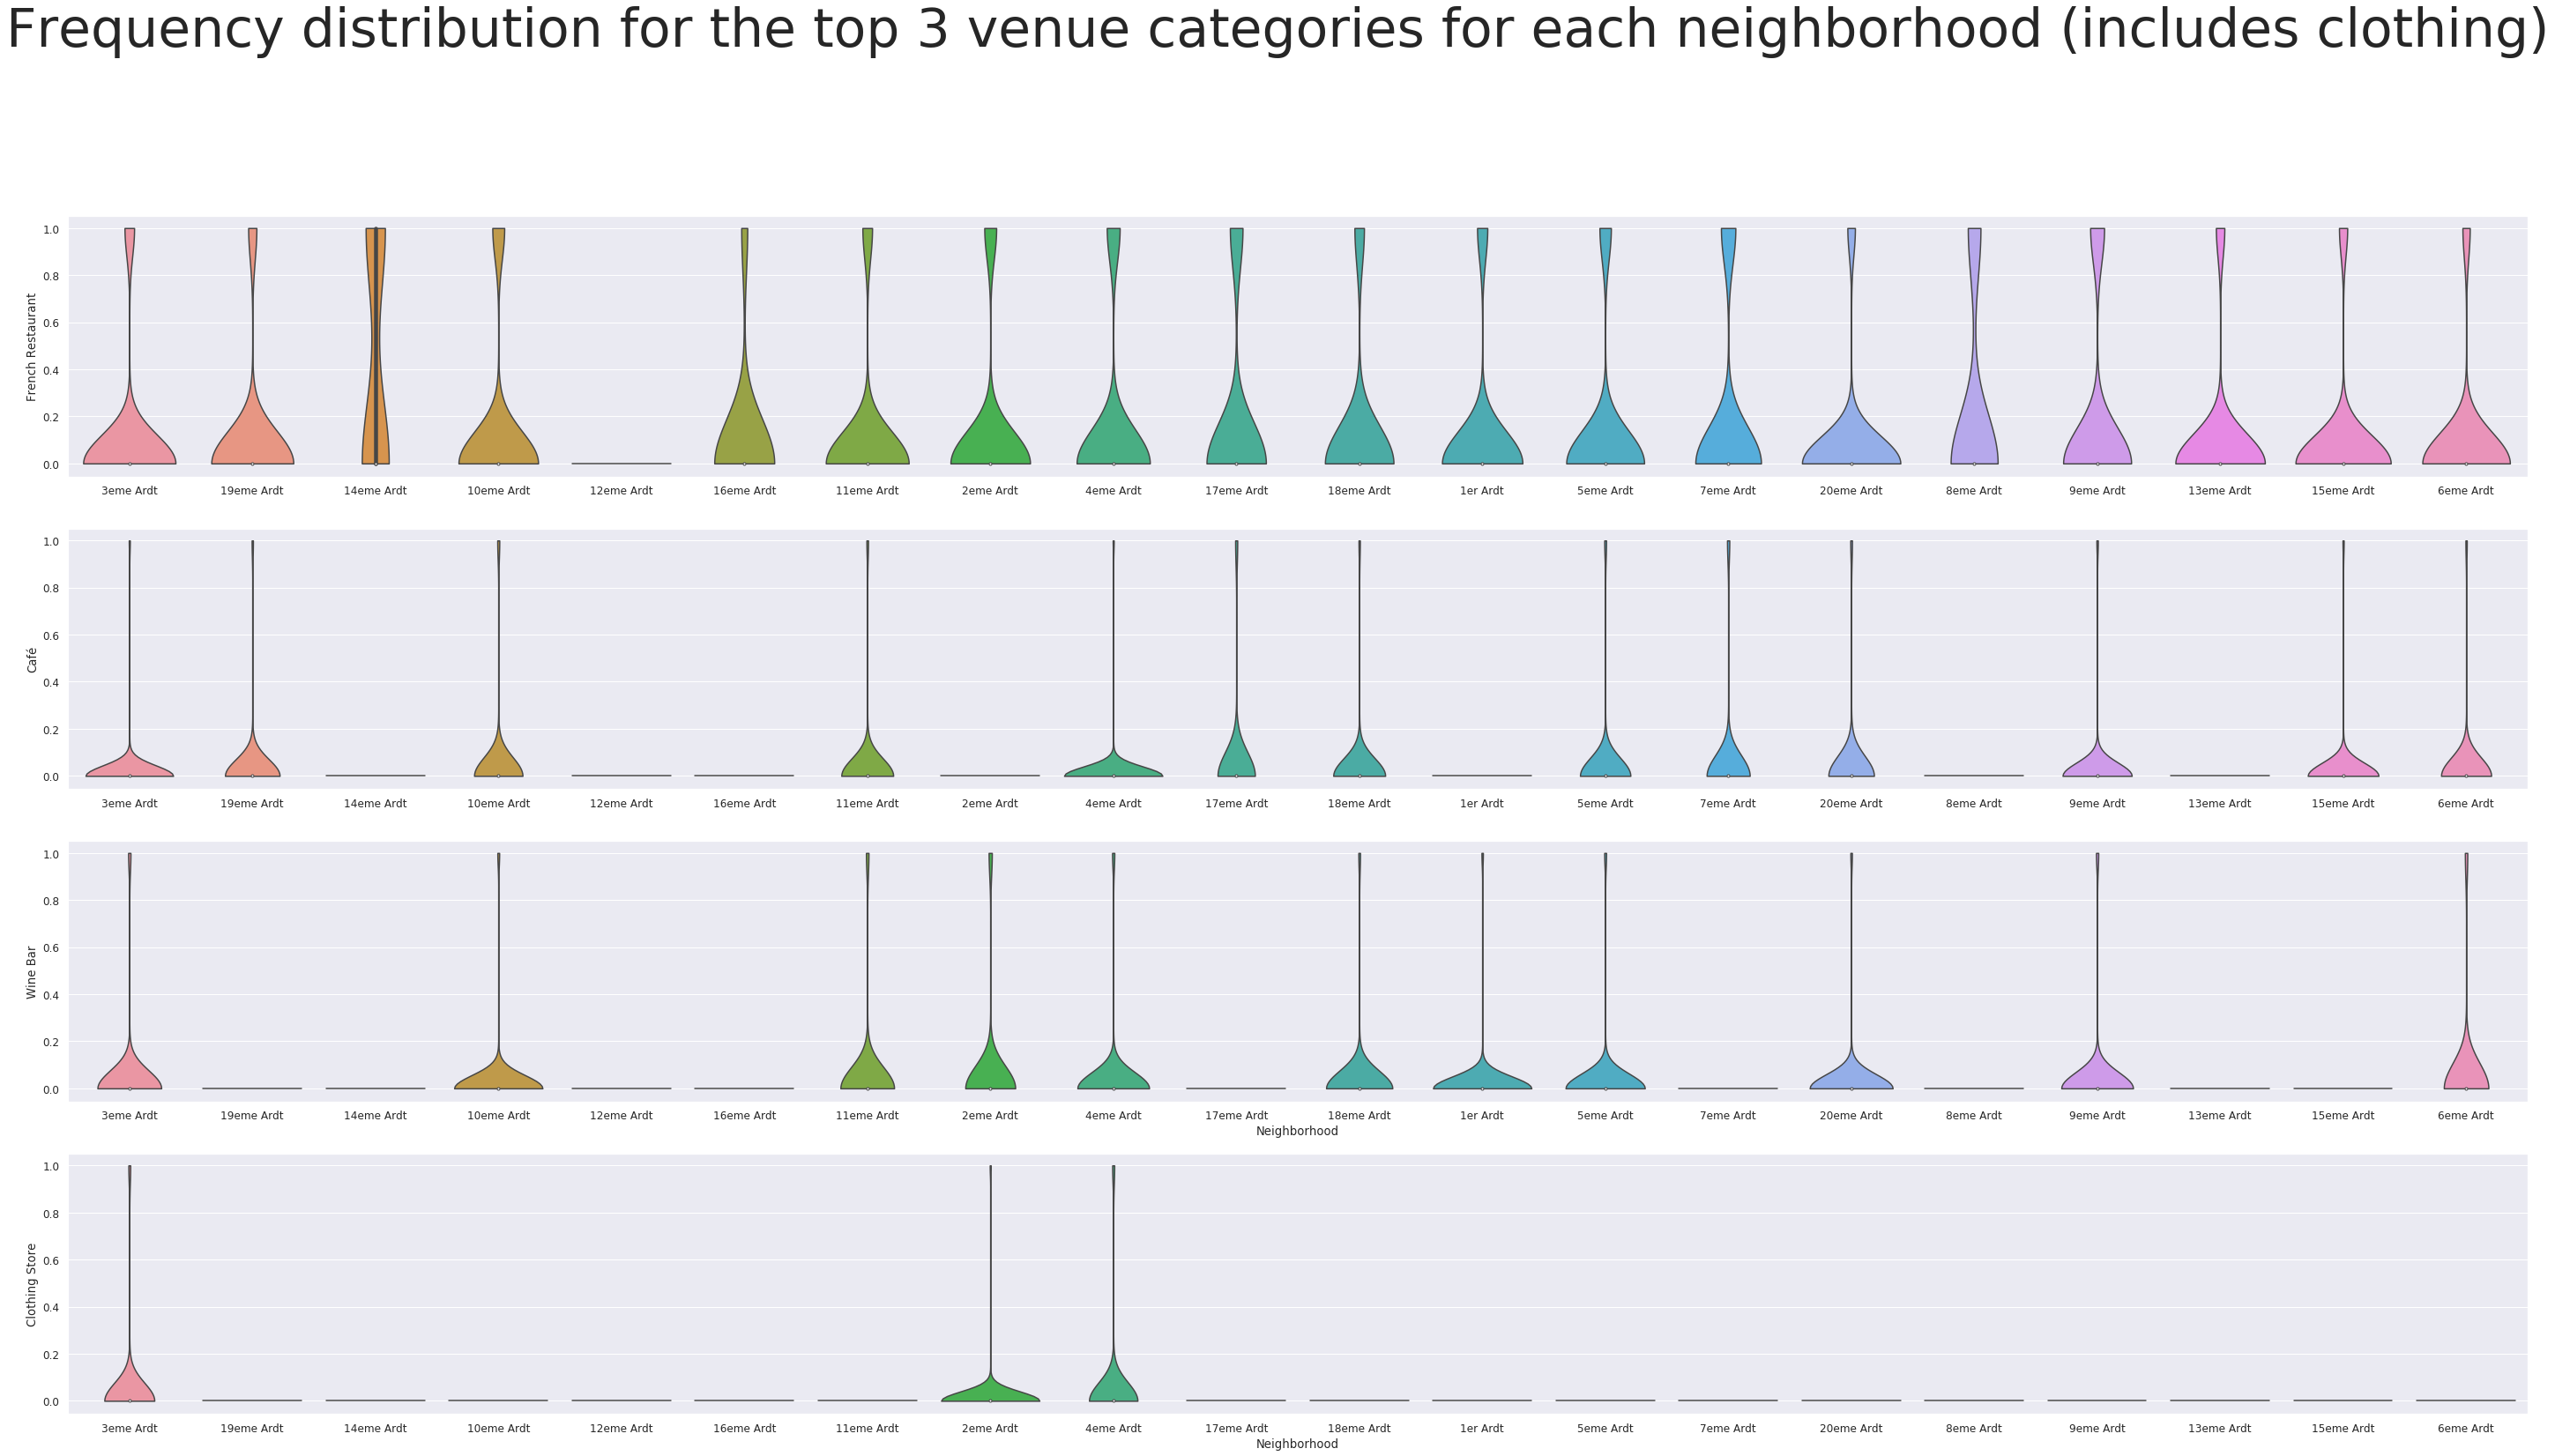

In [32]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()


## 4 Inferences and Discussion

### Chosen Neighborhoods - Results

Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 3 neighbourhoods from the previous 8.

The reasoning being that if the 3 criteria have been met - identifying neighbourhoods that are lively with Restaurants, Cafés and Wine Bars - adding Clothing Stores into the mix of stores in the area is a significant bonus. Having some of the same category of stores in the same area - especially in fashion retail - is very desirable as a retailer.

So we can increase the criteria to include Restaurants, Cafés, Wine Bars and Clothing Stores - which narrows down and focuses the suggested districts for new stores to be located, and at the same time provides better locations for the brand.

So the final 3 prospective neighborhoods for new store locations are where 4 criteria are met:

- 3eme Ardt : Arrondissement 3, Temple
- 4eme Ardt : Arrondissement 4, Hotel-de-Ville
- 6eme Ardt : Arrondissement 6, Luxembourg


### Let's look at the 3 districts on a Paris map

In [33]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


## Where are our chosen districts? Let's visualise them on a map of Paris.

In [34]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

Or for a closer view of Central Paris

In [35]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

### Observations

I guess it's not a surprise that these districts are all very centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

### Inferences

We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

### Conclusions

There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorythms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.